<a href="https://colab.research.google.com/github/vanquoc12/projectMachineLearning/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:

import numpy as np
import matplotlib.pyplot as plt 
import glob
import cv2
from keras.utils import to_categorical

In [64]:
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization
import os
import seaborn as sns
from keras.utils import to_categorical
import tensorflow as tf

In [65]:
#kết nối Google Drive vào môi trường Colaboratory notebook.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
#liệt kê các tệp tin và thư mục có trong đường dẫn
print(os.listdir("/content/drive/MyDrive/flowersquang"))

['train', 'validation']


In [67]:
SIZE=128


In [70]:
#Tạo một vòng lặp để đọc và xử lý các tệp tin hình ảnh trong thư mục
train_images=[]
train_labels=[]
for directory_path in glob.glob("/content/drive/MyDrive/flowersquang/train/*"):
  label=directory_path.split("/")[-1]
  print(label)
  for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
    print(img_path)
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = cv2.resize(img,(SIZE,SIZE))
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    train_images.append(img)
    train_labels.append(label)

hoa mai
/content/drive/MyDrive/flowersquang/train/hoa mai/hoa mai_128.jpg
/content/drive/MyDrive/flowersquang/train/hoa mai/hoa mai_100.jpg
/content/drive/MyDrive/flowersquang/train/hoa mai/hoa mai_011.jpg
/content/drive/MyDrive/flowersquang/train/hoa mai/hoa mai_056.jpg
/content/drive/MyDrive/flowersquang/train/hoa mai/hoa mai_022.jpg
/content/drive/MyDrive/flowersquang/train/hoa mai/hoa mai_094.jpg
/content/drive/MyDrive/flowersquang/train/hoa mai/hoa mai_120.jpg
/content/drive/MyDrive/flowersquang/train/hoa mai/hoa mai_074.jpg
/content/drive/MyDrive/flowersquang/train/hoa mai/hoa mai_014.jpg
/content/drive/MyDrive/flowersquang/train/hoa mai/hoa mai_088.jpg
/content/drive/MyDrive/flowersquang/train/hoa mai/hoa mai_103.jpg
/content/drive/MyDrive/flowersquang/train/hoa mai/hoa mai_064.jpg
/content/drive/MyDrive/flowersquang/train/hoa mai/hoa mai_042.jpg
/content/drive/MyDrive/flowersquang/train/hoa mai/hoa mai_078.jpg
/content/drive/MyDrive/flowersquang/train/hoa mai/hoa mai_035.jpg
/c

In [71]:
#chuyển đổi danh sách train_images và train_labels thành các mảng NumPy.
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [73]:
test_images = []
test_labels = []
for directory_path in glob.glob("//content/drive/MyDrive/flowersquang/train/*"):
  flower_label=directory_path.split("/")[-1]
  for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = cv2.resize(img,(SIZE,SIZE))
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    test_images.append(img)
    test_labels.append(flower_label)
    
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [74]:
#sử dụng module preprocessing từ thư viện sklearn để mã hóa các nhãn (labels) thành các giá trị số.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [75]:
#chia dữ liệu hình ảnh và nhãn thành các tập huấn luyện và tập kiểm tra thông qua việc gán các biến
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [76]:
# chuẩn hóa dữ liệu hình ảnh trong các tập huấn luyện và kiểm tra.
x_train = x_train / 255.0
x_test = x_test / 255.0

In [81]:
#sử dụng module to_categorical từ thư viện keras.utils để chuyển đổi các nhãn (labels) thành dạng one-hot encoding.
from keras.utils import to_categorical
num_classes=3
y_train_one_hot = to_categorical(y_train,num_classes=num_classes)
y_test_one_hot = to_categorical(y_test,num_classes=num_classes)

In [82]:
#sử dụng framework Keras để trích xuất đặc trưng từ hình ảnh

activation = 'sigmoid'

feature_extractor = Sequential()
feature_extractor.add(Conv2D(32, 3, activation=activation, padding='same', input_shape=(128,128,3)))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(32, 3, activation=activation, padding='same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Conv2D(64, 3, activation=activation, padding='same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(64, 3, activation=activation, padding='same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Flatten())


In [83]:
#định nghĩa các lớp fully connected (hoàn toàn kết nối) và lớp dự đoán trong mô hình.
x = feature_extractor.output
x = Dense(128, activation=activation, kernel_initializer='he_uniform')(x)
prediction_layer = Dense(3, activation='softmax')(x)

In [84]:
#tạo ra mô hình hoàn chỉnh bằng cách kết hợp mạng trích xuất đặc trưng (feature_extractor) và các lớp dự đoán.
cnn_model = Model(inputs=feature_extractor.input, outputs=prediction_layer)
cnn_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
print(cnn_model.summary())

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20_input (InputLayer  [(None, 128, 128, 3)]    0         
 )                                                               
                                                                 
 conv2d_20 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 batch_normalization_20 (Bat  (None, 128, 128, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_21 (Conv2D)          (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization_21 (Bat  (None, 128, 128, 32)     128       
 chNormalization)                                                
                                                           

In [85]:
#huấn luyện một mô hình CNN
history = cnn_model.fit(x_train, y_train_one_hot, epochs=20, validation_data=(x_test, y_test_one_hot))

Epoch 1/20
14/14 [==============================] - 39s 3s/step - loss: 0.9010 - accuracy: 0.7466 - val_loss: 4.0616 - val_accuracy: 0.2945
Epoch 2/20
14/14 [==============================] - 38s 3s/step - loss: 0.0513 - accuracy: 0.9817 - val_loss: 3.9769 - val_accuracy: 0.2945
Epoch 3/20
14/14 [==============================] - 39s 3s/step - loss: 0.0238 - accuracy: 0.9932 - val_loss: 3.9550 - val_accuracy: 0.2945
Epoch 4/20
14/14 [==============================] - 40s 3s/step - loss: 0.0817 - accuracy: 0.9772 - val_loss: 3.7064 - val_accuracy: 0.2945
Epoch 5/20
14/14 [==============================] - 38s 3s/step - loss: 0.0083 - accuracy: 0.9977 - val_loss: 3.7568 - val_accuracy: 0.2945
Epoch 6/20
14/14 [==============================] - 40s 3s/step - loss: 0.0165 - accuracy: 0.9977 - val_loss: 3.5412 - val_accuracy: 0.2945
Epoch 7/20
14/14 [==============================] - 38s 3s/step - loss: 0.0101 - accuracy: 0.9977 - val_loss: 3.5223 - val_accuracy: 0.2945
Epoch 8/20
14/14 [==

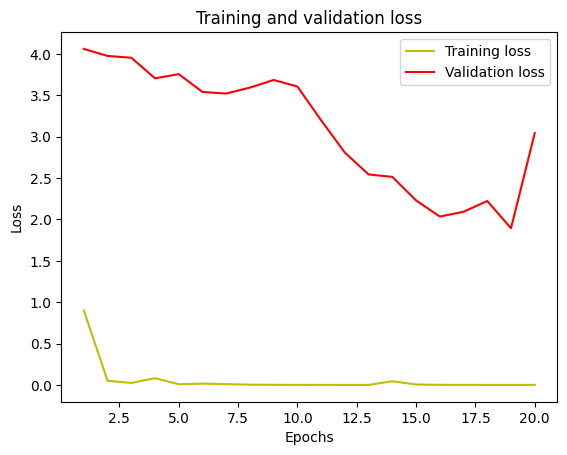

In [93]:


loss = history.history['loss']
val_loss = history.history['val_loss'] 

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

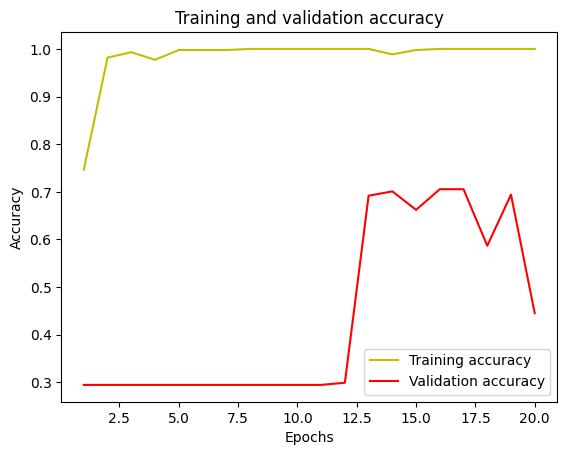

In [96]:
accuracy = history.history['accuracy']
val_accuracy = history.history.get('val_accuracy') # Use .get() to avoid the error if 'val_accuracy' is not present
plt.plot(epochs, accuracy, 'y', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [97]:
#dự đoán các nhãn của dữ liệu kiểm tra (x_test) bằng mô hình CNN (cnn_model).
prediction_NN =  cnn_model.predict(x_test)
prediction_NN = np.argmax(prediction_NN, axis=-1)
prediction_NN = le.inverse_transform(prediction_NN)

14/14 [==============================] - 9s 662ms/step


[[  0 129   0]
 [  0 180   0]
 [  0 114  15]]


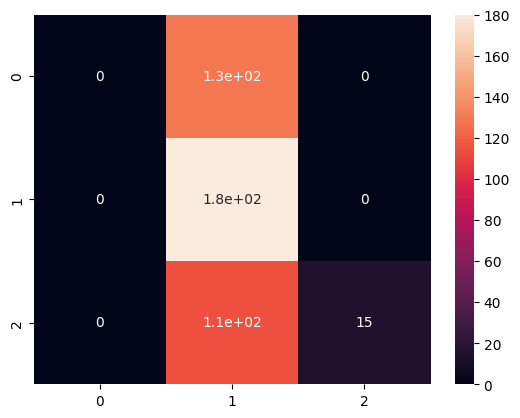

In [105]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(test_labels, prediction_NN)
print(cm)

sns.heatmap(cm, annot=True)
plt.show()


1/1 [==============================] - 0s 52ms/step
The predictin of this image is: ['hoa sen']
The actual label for this image is: hoa sen


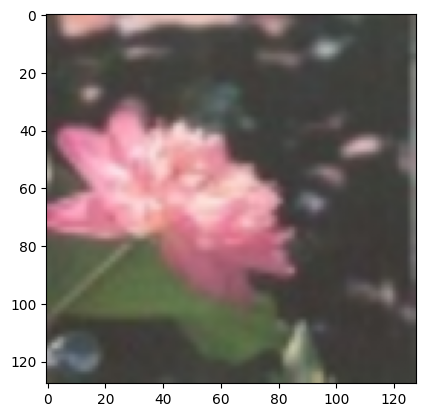

In [125]:
n=230
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0)
prediction = np.argmax(cnn_model.predict(input_img))
prediction = le.inverse_transform([prediction])
print("The predictin of this image is:", prediction)
print("The actual label for this image is:", test_labels[n])

1/1 [==============================] - 0s 36ms/step
The predictin of this image is: ['hoa sen']
The actual label for this image is: hoa mai


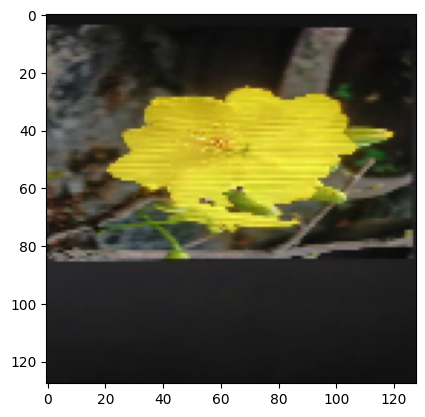

In [102]:
n=3
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0)
prediction = np.argmax(cnn_model.predict(input_img))
prediction = le.inverse_transform([prediction])
print("The predictin of this image is:", prediction)
print("The actual label for this image is:", test_labels[n])

1/1 [==============================] - 0s 35ms/step
The predictin of this image is: ['hoa sen']
The actual label for this image is: hoa sung


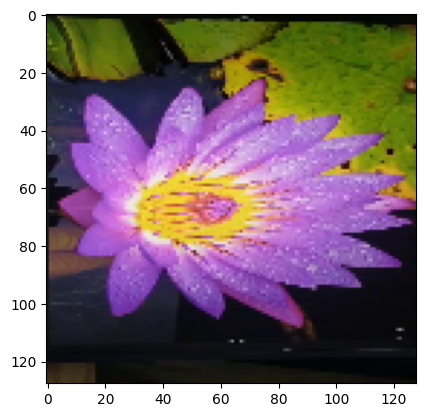

In [113]:
n=350
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0)
prediction = np.argmax(cnn_model.predict(input_img))
prediction = le.inverse_transform([prediction])
print("The predictin of this image is:", prediction)
print("The actual label for this image is:", test_labels[n])

In [114]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Perform feature extraction on training data
X_train_feature = feature_extractor.predict(x_train)

14/14 [==============================] - 8s 548ms/step


In [115]:
# Train a Random Forest classifier with hyperparameter tuning
RF_model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],    # Increase the range of estimators
    'max_depth': [None, 10, 20],        # Increase the range of maximum depths
    'min_samples_split': [2, 5, 10]     # Add min_samples_split parameter
}
grid_search = GridSearchCV(RF_model, param_grid, cv=5)
grid_search.fit(X_train_feature, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [116]:
# Get the best model from the grid search
RF_model = grid_search.best_estimator_

In [117]:
# Perform feature extraction on test data
X_test_feature = feature_extractor.predict(x_test)

14/14 [==============================] - 9s 622ms/step


In [118]:
# Make predictions using the Random Forest model
prediction_RF = RF_model.predict(X_test_feature)

In [119]:
# Inverse transform the predicted labels
prediction_RF = le.inverse_transform(prediction_RF)

In [120]:
# Calculate accuracy using cross-validation
cv_scores = cross_val_score(RF_model, X_train_feature, y_train, cv=5)  # Increase the number of cross-validation folds
print("Cross-validated Accuracy:", cv_scores.mean())

Cross-validated Accuracy: 1.0


<Axes: >

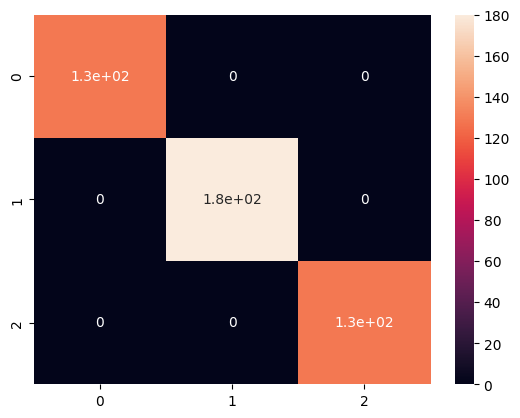

In [121]:
# Create confusion matrix and display heatmap
cm = confusion_matrix(test_labels, prediction_RF)
sns.heatmap(cm, annot=True)

1/1 [==============================] - 0s 29ms/step
The prediction of this image is: ['hoa mai']
The actual label of this image is: hoa mai


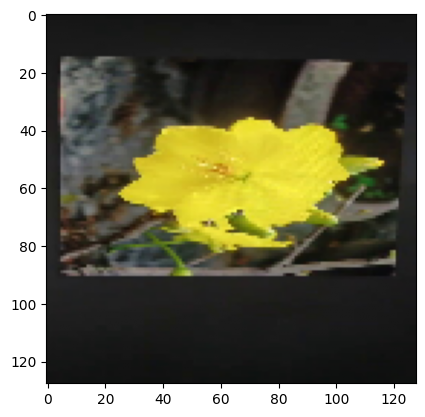

In [122]:
n = 2
img = x_test[n]
plt.imshow(img)

input_img = np.expand_dims(img, axis=0)
input_img_features = feature_extractor.predict(input_img)
prediction = RF_model.predict(input_img_features)[0]
prediction = le.inverse_transform([prediction])

print("The prediction of this image is:", prediction)
print("The actual label of this image is:", test_labels[n])

1/1 [==============================] - 0s 46ms/step
The prediction of this image is: ['hoa sen']
The actual label of this image is: hoa sen


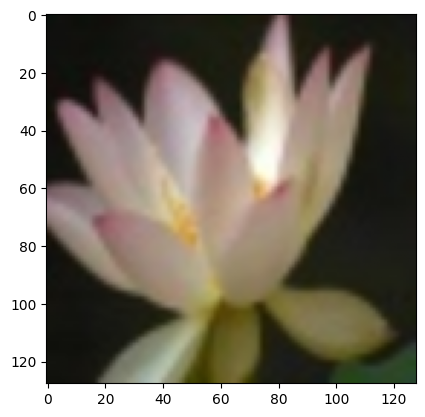

In [123]:
n = 150
img = x_test[n]
plt.imshow(img)

input_img = np.expand_dims(img, axis=0)
input_img_features = feature_extractor.predict(input_img)
prediction = RF_model.predict(input_img_features)[0]
prediction = le.inverse_transform([prediction])

print("The prediction of this image is:", prediction)
print("The actual label of this image is:", test_labels[n])

1/1 [==============================] - 0s 29ms/step
The prediction of this image is: ['hoa sung']
The actual label of this image is: hoa sung


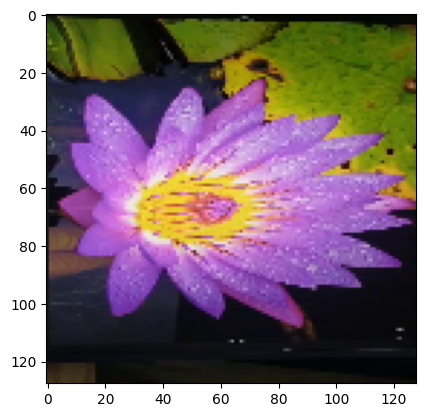

In [124]:
n = 350
img = x_test[n]
plt.imshow(img)

input_img = np.expand_dims(img, axis=0)
input_img_features = feature_extractor.predict(input_img)
prediction = RF_model.predict(input_img_features)[0]
prediction = le.inverse_transform([prediction])

print("The prediction of this image is:", prediction)
print("The actual label of this image is:", test_labels[n])